In [136]:
import numpy as np
import scipy as sc
from bs4 import BeautifulSoup
import pybaseball as pyb
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt
from scipy import stats
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 
def center(L):
    return [np.mean([a, b]) for (a, b) in list(zip(L[:-1], L[1:]))]

In [3]:
data16_18 = pyb.statcast(start_dt='2016-03-01', end_dt='2018-10-05')

This is a large query, it may take a moment to complete
Skipping offseason dates
Query unsuccessful for data from 2017-03-15 to 2017-03-20. Skipping these dates.
Query unsuccessful for data from 2017-03-21 to 2017-03-21. Skipping these dates.
Query unsuccessful for data from 2017-03-22 to 2017-03-26. Skipping these dates.
Query unsuccessful for data from 2017-03-27 to 2017-03-27. Skipping these dates.
Completed sub-query from 2017-03-28 to 2017-04-02
Completed sub-query from 2017-04-03 to 2017-04-08
Completed sub-query from 2017-04-09 to 2017-04-14
Completed sub-query from 2017-04-15 to 2017-04-20
Completed sub-query from 2017-04-21 to 2017-04-26
Completed sub-query from 2017-04-27 to 2017-05-02
Completed sub-query from 2017-05-03 to 2017-05-08
Completed sub-query from 2017-05-09 to 2017-05-14
Completed sub-query from 2017-05-15 to 2017-05-20
Completed sub-query from 2017-05-21 to 2017-05-26
Completed sub-query from 2017-05-27 to 2017-06-01


/Users/bennettferris/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  if __name__ == '__main__':


Completed sub-query from 2017-06-02 to 2017-06-07
Completed sub-query from 2017-06-08 to 2017-06-13
Completed sub-query from 2017-06-14 to 2017-06-19
Completed sub-query from 2017-06-20 to 2017-06-25
Completed sub-query from 2017-06-26 to 2017-07-01
Completed sub-query from 2017-07-02 to 2017-07-07
Completed sub-query from 2017-07-08 to 2017-07-13
Completed sub-query from 2017-07-14 to 2017-07-19
Completed sub-query from 2017-07-20 to 2017-07-25
Completed sub-query from 2017-07-26 to 2017-07-31
Completed sub-query from 2017-08-01 to 2017-08-06
Completed sub-query from 2017-08-07 to 2017-08-12
Completed sub-query from 2017-08-13 to 2017-08-18
Completed sub-query from 2017-08-19 to 2017-08-24
Completed sub-query from 2017-08-25 to 2017-08-30
Completed sub-query from 2017-08-31 to 2017-09-05
Completed sub-query from 2017-09-06 to 2017-09-11
Completed sub-query from 2017-09-12 to 2017-09-17
Completed sub-query from 2017-09-18 to 2017-09-23
Completed sub-query from 2017-09-24 to 2017-09-29


In [9]:
np.shape(data16_18)

(1456040, 90)

In [12]:
sorted(list(data16_18.columns))

['at_bat_number',
 'away_score',
 'away_team',
 'ax',
 'ay',
 'az',
 'babip_value',
 'balls',
 'bat_score',
 'batter',
 'bb_type',
 'break_angle_deprecated',
 'break_length_deprecated',
 'des',
 'description',
 'effective_speed',
 'estimated_ba_using_speedangle',
 'estimated_woba_using_speedangle',
 'events',
 'fielder_2',
 'fielder_2.1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'fld_score',
 'game_date',
 'game_pk',
 'game_type',
 'game_year',
 'hc_x',
 'hc_y',
 'hit_distance_sc',
 'hit_location',
 'home_score',
 'home_team',
 'if_fielding_alignment',
 'index',
 'inning',
 'inning_topbot',
 'iso_value',
 'launch_angle',
 'launch_speed',
 'launch_speed_angle',
 'of_fielding_alignment',
 'on_1b',
 'on_2b',
 'on_3b',
 'outs_when_up',
 'p_throws',
 'pfx_x',
 'pfx_z',
 'pitch_name',
 'pitch_number',
 'pitch_type',
 'pitcher',
 'pitcher.1',
 'plate_x',
 'plate_z',
 'player_name',
 'post_away_score',
 'post_bat_score',
 'post_fld_scor

In [261]:
data16_18['hit_distance_sc']

0            NaN
1            NaN
2            NaN
3            NaN
4          228.0
5            NaN
6            NaN
7           43.0
8            NaN
9          205.0
10           NaN
11          65.0
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20         307.0
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
           ...  
1456010      NaN
1456011      NaN
1456012      NaN
1456013    370.0
1456014      NaN
1456015      NaN
1456016      NaN
1456017    231.0
1456018      NaN
1456019    345.0
1456020      NaN
1456021    299.0
1456022      NaN
1456023      NaN
1456024     56.0
1456025      NaN
1456026      NaN
1456027      NaN
1456028    265.0
1456029      NaN
1456030      NaN
1456031      NaN
1456032      NaN
1456033      NaN
1456034      NaN
1456035      NaN
1456036    256.0
1456037      N

In [283]:
cols = ['launch_speed', 'launch_angle', 'events', 'estimated_ba_using_speedangle', 'hit_distance_sc']
speed_angles_16_18 = data16_18[cols].dropna()
print(sorted(list(np.unique(speed_angles_16_18['events']))))
events_in_play = ['single', 'double', 'triple', 'home_run', 
                  'double_play', 'field_error', 'field_out', 'fielders_choice', 'fielders_choice_out',
                 'force_out', 'grounded_into_double_play', 'triple_play']
speed_angles_inplay_16_18 = speed_angles_16_18.loc[speed_angles_16_18['events'].isin(events_in_play)]
print(sorted(list(np.unique(speed_angles_inplay_16_18['events']))))

['double', 'double_play', 'field_error', 'field_out', 'fielders_choice', 'fielders_choice_out', 'force_out', 'grounded_into_double_play', 'home_run', 'sac_bunt', 'sac_fly', 'sac_fly_double_play', 'single', 'triple', 'triple_play']
['double', 'double_play', 'field_error', 'field_out', 'fielders_choice', 'fielders_choice_out', 'force_out', 'grounded_into_double_play', 'home_run', 'single', 'triple', 'triple_play']


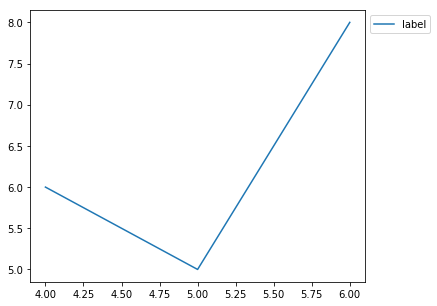

In [263]:
plt.figure(1, (6, 5))
plt.plot([4, 5, 6], [6, 5, 8], label='label')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

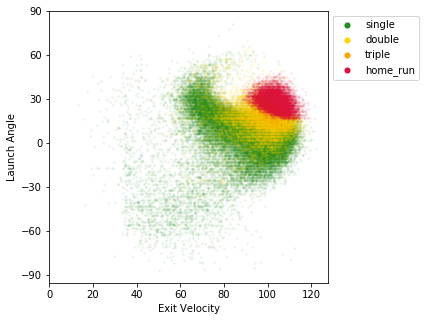

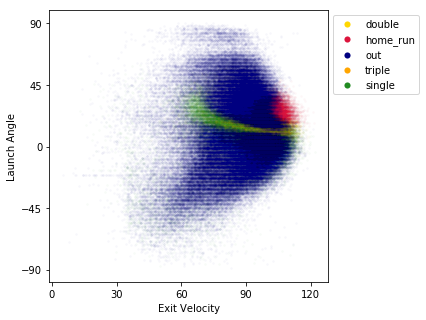

In [284]:
# scatter all balls in play by launch_angle, launch_speed
plt.close()
plt.figure(1, (5, 5))
for this_event in events_in_play:
    if this_event == 'single':
        c = 'forestgreen'
    elif this_event == 'double':
        c = 'gold'
    elif this_event == 'triple':
        c = 'orange'
    elif this_event == 'home_run':
        c = 'crimson'
    else:
        continue
    
    l = this_event
    
    df = speed_angles_inplay_16_18.loc[speed_angles_inplay_16_18['events'] == this_event]
    
    plt.scatter(df['launch_speed'], df['launch_angle'], 
                label = l, c=c, s=6, alpha=0.1, lw=0)
plt.yticks(np.linspace(-90, 90, 7))
plt.xticks(np.linspace(0, 120, 7))
plt.xlabel('Exit Velocity')
plt.ylabel('Launch Angle')
leg = plt.legend(markerscale=2.5, loc='upper left', bbox_to_anchor=(1, 1))

for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.show()

plt.figure(1, (5, 5))
for this_event in events_in_play:
    if this_event == 'single':
        c = 'forestgreen'
    elif this_event == 'double':
        c = 'gold'
    elif this_event == 'triple':
        c = 'orange'
    elif this_event == 'home_run':
        c = 'crimson'
    else:
        c = 'navy'
    
    if not(this_event in ['single', 'double', 'triple', 'home_run']):
        l = 'out'
    else:
        l = this_event
    
    df = speed_angles_inplay_16_18.loc[speed_angles_inplay_16_18['events'] == this_event]
    
    plt.scatter(df['launch_speed'], df['launch_angle'], 
                label = l, c=c, s=6, alpha=0.03, lw=0)
plt.yticks(np.linspace(-90, 90, 5))
plt.xticks(np.linspace(0, 120, 5))
plt.xlabel('Exit Velocity')
plt.ylabel('Launch Angle')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
leg = plt.legend(by_label.values(), by_label.keys(),
                 markerscale = 2.5, loc='upper left', bbox_to_anchor=(1, 1))
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.show()

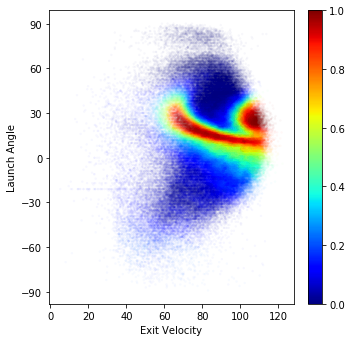

In [309]:
# Apparently statcast estiamtes batting average using these two values
# scatter all the in-play events, color coding by this value
plt.close()
plt.figure(1, (5, 5*1.08))
plt.scatter(speed_angles_inplay_16_18_no_error['launch_speed'],
           speed_angles_inplay_16_18_no_error['launch_angle'],
           c=speed_angles_inplay_16_18_no_error['estimated_ba_using_speedangle'],
           cmap = plt.cm.get_cmap('jet'), s=6, alpha=0.03, lw=0)
plt.yticks(np.linspace(-90, 90, 7))
plt.xticks(np.linspace(0, 120, 7))
plt.xlabel('Exit Velocity')
plt.ylabel('Launch Angle')
cb = plt.colorbar(fraction = 1 - (1 / 1.08))
cb.set_alpha(1)
cb.draw_all()
plt.show()

/Users/bennettferris/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['double', 'double_play', 'field_error', 'field_out', 'fielders_choice', 'fielders_choice_out', 'force_out', 'grounded_into_double_play', 'home_run', 'single', 'triple', 'triple_play']
['double', 'double_play', 'field_error', 'field_out', 'fielders_choice', 'fielders_choice_out', 'force_out', 'grounded_into_double_play', 'home_run', 'single', 'triple', 'triple_play']
0.6969380789858606
0.6983193646057309


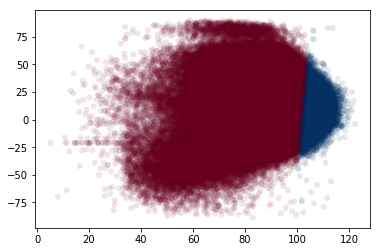

In [446]:
# estimate BA myself via logistic regression of exit velocity and launch angle
events_in_play_no_error = ['single', 'double', 'triple', 'home_run', 
                  'double_play', 'field_out', 'fielders_choice', 'fielders_choice_out', 'field_error',
                 'force_out', 'grounded_into_double_play', 'triple_play']
speed_angles_inplay_16_18_no_error = speed_angles_16_18.loc[speed_angles_16_18['events'].isin(events_in_play_no_error)]

hitcatlist = ['single', 'double', 'triple', 'home_run']

for df in [speed_angles_inplay_16_18, speed_angles_inplay_16_18_no_error]:
    df['hit'] = df['events'].isin(hitcatlist)
print(sorted(list(np.unique(speed_angles_inplay_16_18['events']))))
print(sorted(list(np.unique(speed_angles_inplay_16_18_no_error['events']))))

X = speed_angles_inplay_16_18[['launch_speed', 'launch_angle', 'estimated_ba_using_speedangle']]
Y = speed_angles_inplay_16_18['hit']

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, test_size = 0.1)
mu_train = np.mean(X_train[['launch_speed', 'launch_angle']], axis=0)
std_train = np.std(X_train[['launch_speed', 'launch_angle']], axis=0)
X_train_norm = (X_train[['launch_speed', 'launch_angle']] - mu_train) / std_train

mu_test = np.mean(X_test[['launch_speed', 'launch_angle']], axis=0)
std_test = np.std(X_test[['launch_speed', 'launch_angle']], axis=0)
X_test_norm = (X_test[['launch_speed', 'launch_angle']] - mu_train) / std_train

lr = sk.linear_model.LogisticRegression(random_state=1, max_iter = 5000, solver = 'lbfgs')
lr.fit(X_train_norm, y_train)
score_train = lr.score(X_train_norm, y_train)
print(score_train)
score_test = lr.score(X_test_norm, y_test)
print(score_test)
# Figure out what the heck "score" is

y_train_pred = lr.predict(X_train_norm)
X_train
plt.scatter(X_train['launch_speed'], X_train['launch_angle'], 
            c=y_train_pred, cmap = 'RdBu', lw=0, alpha=0.1)
plt.show()

# This looks awful


In [447]:
MLP = MLPClassifier(activation='relu', alpha=1e-04, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(8, 8),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=5000, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=1,
              shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train[['launch_speed', 'launch_angle']])  
X_train_norm = scaler.transform(X_train[['launch_speed', 'launch_angle']])  
# apply same transformation to test data
X_test_norm = scaler.transform(X_test[['launch_speed', 'launch_angle']])

MLP.fit(X_train_norm, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(8, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [341]:
type(y_train_prob)

numpy.ndarray

In [344]:
print(y_train_pred[:10], y_train_prob[:10, :])


[ True False False False  True  True False  True False False] [[0.4845492  0.5154508 ]
 [0.94844918 0.05155082]
 [0.77663717 0.22336283]
 [0.91392999 0.08607001]
 [0.31862261 0.68137739]
 [0.35147281 0.64852719]
 [0.82076383 0.17923617]
 [0.44677121 0.55322879]
 [0.57594291 0.42405709]
 [0.65745569 0.34254431]]


In [366]:
4. / (1-frac) * .85

4.0

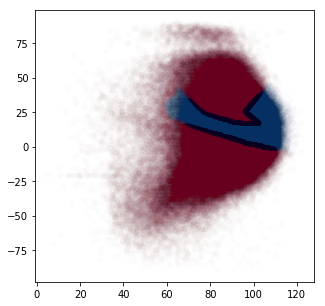

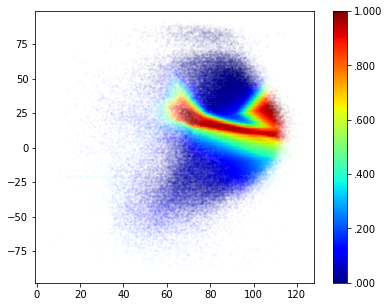

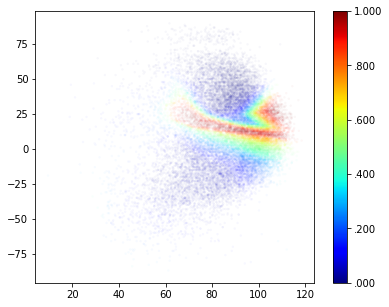

In [448]:
y_train_pred = MLP.predict(X_train_norm)
y_train_prob = MLP.predict_proba(X_train_norm)
y_test_pred = MLP.predict(X_test_norm)
y_test_prob = MLP.predict_proba(X_test_norm)

plt.figure(1, (5, 5))
plt.scatter(X_train['launch_speed'], X_train['launch_angle'], 
            c=y_train_pred, cmap = 'RdBu', lw=0, alpha=0.01)
plt.show()

plt.close()
frac = .2
pad = .05
plt.figure(2, (5. / (1-frac-pad), 5))
plt.scatter(X_train['launch_speed'], X_train['launch_angle'],
            c=y_train_prob[:, 1], cmap = 'jet', s=6, alpha=0.03, lw=0)
plt.clim(0, 1)
cb = plt.colorbar(fraction = frac, pad=pad)
cb.set_alpha(1)
cb.draw_all()
cb.set_ticks([0, .2, .4, .6, .8, 1.])
cb.set_ticklabels(['.000', '.200', '.400', '.600', '.800', '1.000'])
plt.show()

plt.close()
frac = .2
pad = .05
plt.figure(2, (5. / (1-frac-pad), 5))
plt.scatter(X_test['launch_speed'], X_test['launch_angle'],
            c=y_test_prob[:, 1], cmap = 'jet', s=6, alpha=0.03, lw=0)
plt.clim(0, 1)
cb = plt.colorbar(fraction = frac, pad=pad)
cb.set_alpha(1)
cb.draw_all()
cb.set_ticks([0, .2, .4, .6, .8, 1.])
cb.set_ticklabels(['.000', '.200', '.400', '.600', '.800', '1.000'])
plt.show()

In [427]:
print(eba_train.sort_index()[:12])
print(y_train_prob[:12, 1])


9     0.853
11    0.226
20    0.087
30    0.779
33    0.726
47    0.005
51    0.258
56    0.121
60    0.150
79    0.503
80    0.124
84    0.366
Name: estimated_ba_using_speedangle, dtype: float64
[0.27858355 0.13989684 0.01292639 0.29828546 0.43717718 0.76092384
 0.93755632 0.09775482 0.05959877 0.19589355 0.26561598 0.18357907]


How accurately the model predicts hit probability, Train and Test:
0.7948951730862993 0.7925314844881303

 How accurately Statcast's 'estimated_ba_using_speedangle' feature predicts hit probability, Train and Test:
0.7961189663578742 0.7917855105533371

 How accurately the model predicts the 'estimated_ba_using_speedangle' feature, Train and Test:
0.9772745002437835 0.9781034709728378

 Correlation between Bennett's predicted hit probability vs. Statcast's, training data
(0.9912400255615813, 0.0)


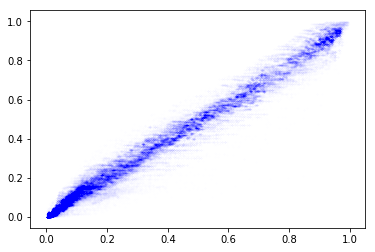


 Correlation between Bennett's predicted hit probability vs. Statcast's, testing data
(0.9911546436469726, 0.0)


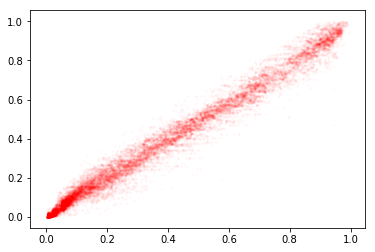

In [452]:
y_train_pred = MLP.predict(X_train_norm)
y_train_prob = MLP.predict_proba(X_train_norm)
y_test_pred = MLP.predict(X_test_norm)
y_test_prob = MLP.predict_proba(X_test_norm)

eba_train = X_train['estimated_ba_using_speedangle']
eba_train_pred = eba_train >= 0.5
eba_test = X_test['estimated_ba_using_speedangle']
eba_test_pred = eba_test >= 0.5

print('How accurately the model predicts hit probability, Train and Test:')
print(MLP.score(X_train_norm, y_train), MLP.score(X_test_norm, y_test))

from sklearn.metrics import accuracy_score
print('\n', 
      "How accurately Statcast's 'estimated_ba_using_speedangle' feature predicts hit probability, Train and Test:")
print(accuracy_score(eba_train_pred, y_train), accuracy_score(eba_test_pred, y_test)) 

print('\n',
      "How accurately the model predicts the 'estimated_ba_using_speedangle' feature, Train and Test:")
print(MLP.score(X_train_norm, eba_train_pred), MLP.score(X_test_norm, eba_test_pred))

# Okay, that's pretty weird. 
# Seems like my model does a much better job predicting Statcast's boutique feature ('estimated_ba_using_speedangle)
# (Upon which it was NOT trained)
# Than it does predicting actual hit probability
# My assessment: I have accidentally reverse-engineered a facsimile of Statcast's model 
# Let's plot my predicted probabilities against those of Statcast

print('\n', "Correlation between Bennett's predicted hit probability vs. Statcast's, training data")
print(sc.stats.pearsonr(y_train_prob[:, 1], eba_train))
plt.scatter(y_train_prob[:, 1], eba_train, c='b', lw=0, s=6, alpha=0.005)
plt.show()

print('\n', "Correlation between Bennett's predicted hit probability vs. Statcast's, testing data")
print(sc.stats.pearsonr(y_test_prob[:, 1], eba_test))
plt.scatter(y_test_prob[:, 1], eba_test, c='r', lw=0, s=6, alpha=0.03)
plt.show()


In [438]:
y_train_prob

array([[0.72141645, 0.27858355],
       [0.86010316, 0.13989684],
       [0.98707361, 0.01292639],
       ...,
       [0.88105158, 0.11894842],
       [0.39823071, 0.60176929],
       [0.74632102, 0.25367898]])

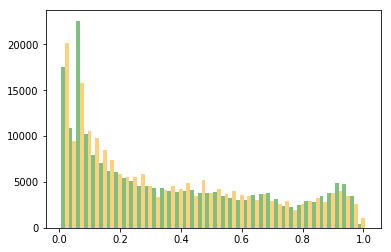

In [455]:
b, e = np.histogram(y_train_prob[:, 1], range = (0, 1), bins=40)
b_real, e = np.histogram(eba_train, range = (0, 1), bins=40)
plt.bar(center(e), b, width=.5/len(b), color='g', alpha = 0.5)
plt.bar(e[1:], b_real, width=.5/len(b), color='orange', alpha=0.5)
plt.show()

In [397]:
y_test, eba_test_pred

(1330446    False
 770148     False
 2751        True
 164495      True
 1426212    False
 528487      True
 1364591    False
 224908     False
 87345       True
 789684     False
 1235253    False
 34313      False
 1309269     True
 845785     False
 1258714     True
 476552     False
 1005444     True
 911821     False
 14915       True
 851598      True
 937905      True
 349197      True
 1070372     True
 290852     False
 382038      True
 2763       False
 283241     False
 677567      True
 383425     False
 1415056     True
            ...  
 691826      True
 557359      True
 93551      False
 894510     False
 1429580     True
 715374      True
 866253     False
 328920      True
 1221218    False
 511351     False
 999359      True
 1154996    False
 610422     False
 1238232    False
 245964     False
 1307245    False
 347736     False
 758018     False
 1374932    False
 1366907    False
 291207     False
 501028     False
 537849     False
 1070614    False
 1051273  

Errors: 2774 Outs: 147579 Hits: 80310
Percentage of balls put in play that are errors: 1.2026202728656092 %
P-value on assumption that Error Estimated BA is drawn from same distribution as those of outs: 5.782524615233575e-56


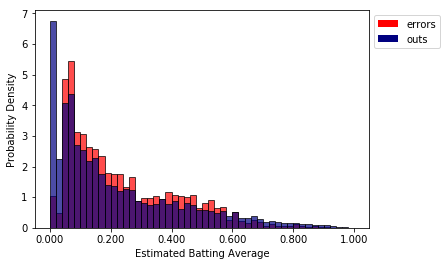

Average Estimated BA on Outs: 0.21524243286646477 Average Estimated BA on Errors: 0.23321593366979093
Median Estimated BA on Outs: 0.14 Median Estimated BA on Errors: 0.175
3.413252905774084e-30
6.461898327721891e-06


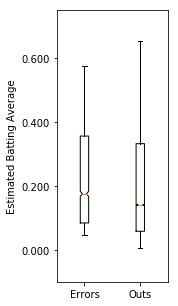

In [285]:
hitcatlist = ['single', 'double', 'triple', 'home_run']
outcatlist = [e for e in events_in_play if not e in hitcatlist]
errors = speed_angles_inplay_16_18.loc[speed_angles_inplay_16_18['events'] == 'field_error']
outs = speed_angles_16_18.loc[speed_angles_16_18['events'].isin(outcatlist)]
hits = speed_angles_16_18.loc[speed_angles_16_18['events'].isin(hitcatlist)]

hit_eba = hits['estimated_ba_using_speedangle']
error_eba = errors['estimated_ba_using_speedangle']
out_eba = outs['estimated_ba_using_speedangle']

print('Errors:', len(error_eba), 'Outs:', len(out_eba), 'Hits:', len(hit_eba))
print('Percentage of balls put in play that are errors:',
      100*len(error_eba) / float(sum([len(errors), len(out_eba), len(hit_eba)])), '%')
eb, ee = np.histogram(error_eba, bins=50, range=(0, 1), density=True)
ob, oe = np.histogram(out_eba, bins=50, range=(0, 1), density=True)

plt.close()
plt.bar(center(ee), eb, width=(ee[1]-ee[0]),
        edgecolor='k',lw=1,facecolor='r', label = 'errors', alpha=0.7)
plt.bar(center(oe), ob, width=(oe[1]-oe[0]),
        edgecolor='k', lw=1,facecolor='navy', label = 'outs', alpha=0.7)
leg = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Estimated Batting Average')
plt.ylabel('Probability Density')
xt = [0., .2, .4, .6, .8, 1.]
xtl = ['0.000', '0.200', '0.400', '0.600', '0.800', '1.000']
plt.xticks(xt)
plt.gca().set_xticklabels(xtl)
D, p = stats.ks_2samp(error_eba, out_eba)
print('P-value on assumption that Error Estimated BA is drawn from same distribution as those of outs:', p)
for lh in leg.legendHandles: 
    lh.set_facecolor(lh.get_facecolor())
    #lh.set_edgecolor(lh.get_edgecolor())
    lh.set_alpha(1.0)
plt.show()

# Integrate the probability multiplied by the associated estimated batting average
eb_prob = eb * (ee[1]-ee[0])
average_error_eba = np.sum(center(ee)*eb_prob)
ob_prob = ob * (oe[1]-oe[0])
average_out_eba = (np.sum(center(oe)*ob_prob))

print('Average Estimated BA on Outs:', np.mean(out_eba), 
      'Average Estimated BA on Errors:', np.mean(error_eba))
print('Median Estimated BA on Outs:', np.median(out_eba), 
      'Median Estimated BA on Errors:', np.median(error_eba))
mwu, pwu = stats.mannwhitneyu(error_eba, out_eba)
print(pwu)
tstat, tp = stats.ttest_ind(error_eba, out_eba)
print(tp)

plt.close()
plt.figure(2, (2, 5))
plt.boxplot([error_eba, out_eba], whis=[5, 95], notch=True, positions = [1, 2], sym='')
plt.ylim((-.1, 0.750))
yt = [0, .2, .4, .6]
plt.yticks(yt)
ytl = ['0.000', '0.200', '0.400', '0.600', '0.800', '1.000']
plt.gca().set_yticklabels(ytl)
plt.gca().set_xticklabels(['Errors', 'Outs'])
plt.ylabel('Estimated Batting Average')
plt.show()

#plt.close()
#plt.figure(3, (5, 5))
#vpe = plt.violinplot(error_eba, [1], points=1000, widths=0.7,
#               showmeans=True, showextrema=True, showmedians=True, bw_method=0.5)
#vpo = plt.violinplot(out_eba, [2], points=1000, widths=0.7,
#               showmeans=True, showextrema=True, showmedians=True, bw_method=0.5)
#for i, violin_parts in enumerate([vpe, vpo]):
#    for pc in violin_parts['bodies']:
#        if i == 0:
#            pc.set_facecolor('red')
#        elif i == 1:
#            pc.set_facecolor('navy')
#        pc.set_edgecolor('black')
#plt.show()


In [ ]:
.175 - .14

Average Launch Angle on Outs: 11.016980735741535 Average Launch Angle on Errors: -8.394736842105264
Median Launch Angle on Outs: 9.0 Average Launch Angle on Errors: -8.0
4.145688240310221e-272
1.0017898976142081e-261


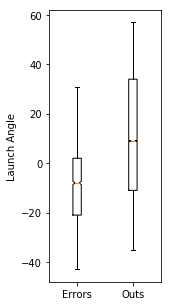

Average Exit Velocity on Outs: 85.1484316874352 Average Exit Velocity on Errors: 84.08900504686373
Median Exit Velocity on Outs: 87.7 Average Exit Velocity on Errors: 86.8
0.009861696814337717
0.00010168279903496834


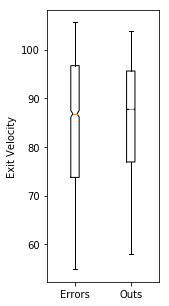

In [462]:
ydict = {'Exit Velocity': 'launch_speed', 
          'Launch Angle': 'launch_angle'}
for iy, (ylabel, ystr) in enumerate(ydict.items()):
    hit_col = hits[ystr]
    error_col = errors[ystr]
    out_col = outs[ystr]
    plt.close()
    plt.figure(iy, (2, 5))
    plt.boxplot([error_col, out_col], whis=[5, 95], notch=True, positions = [1, 2], sym='')
    #plt.ylim((-.1, 0.750))
    #yt = [0, .2, .4, .6]
    #plt.yticks(yt)
    #ytl = ['0.000', '0.200', '0.400', '0.600', '0.800', '1.000']
    #plt.gca().set_yticklabels(ytl)
    plt.gca().set_xticklabels(['Errors', 'Outs'])
    plt.ylabel(ylabel)
    print('Average ' + ylabel + ' on Outs:', np.mean(out_col), 
      'Average ' + ylabel + ' on Errors:', np.mean(error_col))
    print('Median ' + ylabel + ' on Outs:', np.median(out_col), 
          'Average ' + ylabel + ' on Errors:', np.median(error_col))
    mwu, pwu = stats.mannwhitneyu(error_col, out_col)
    print(pwu)
    tstat, tp = stats.ttest_ind(error_col, out_col)
    print(tp)
    plt.show()

Index(['launch_speed', 'launch_angle', 'hit_distance_sc'], dtype='object')
2


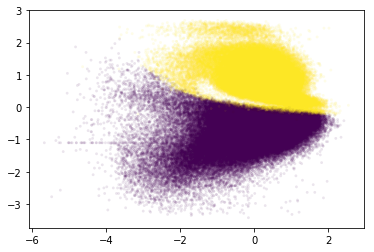

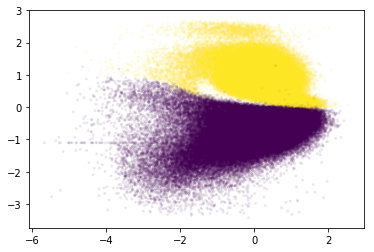



3


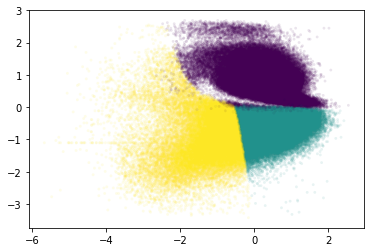

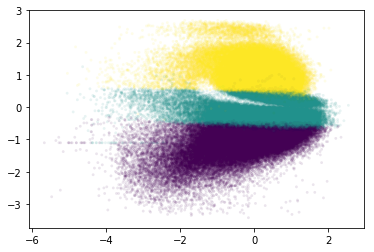



4


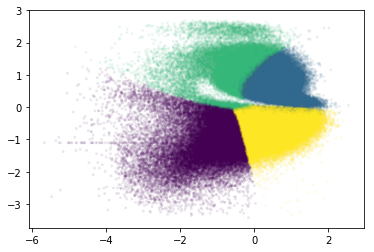

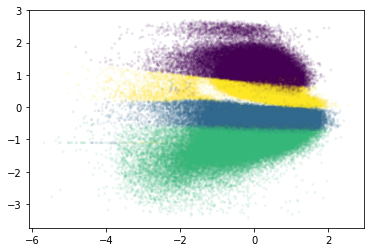



5


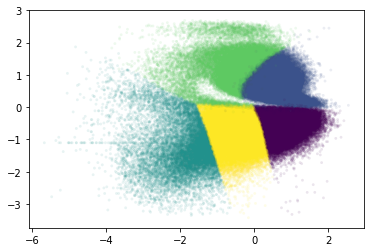

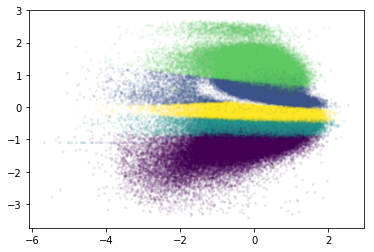



6


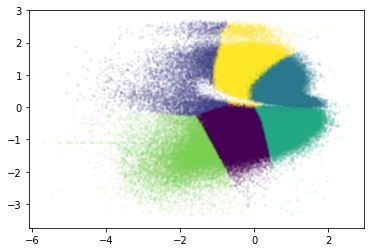

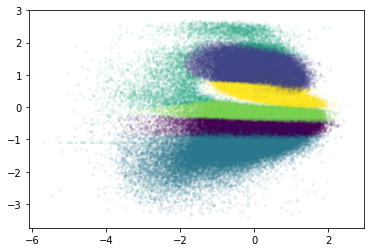



7


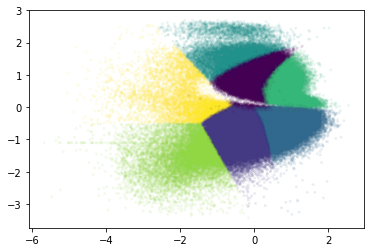

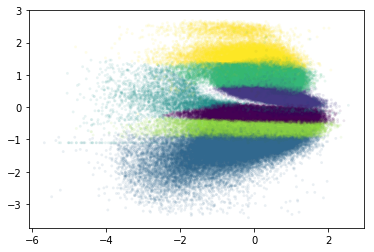

In [282]:
# Of course, not all outs are created equal.
# Intuitively, there are ground balls (low launch angle)
# line drives (medium launch angle)
# and fly balls (high launch angle)
# and these different batted balls have different exit velocity profiles

out_speed_angle = outs[['launch_speed', 'launch_angle', 'hit_distance_sc']]
errors_speed_angle = errors[['launch_speed', 'launch_angle', 'hit_distance_sc']]

print(out_speed_angle.columns)
X = np.array(out_speed_angle)
mu = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = X - mu
X = X / std

from sklearn.cluster import KMeans
from sklearn import cluster, datasets, mixture
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,8):
    print(i)
    km = KMeans(n_clusters=i, random_state=1, max_iter=5000)
    l = km.fit_predict(X)
    #s_s = metrics.silhouette_score(X, l)
    #s_score_dict[i] = [s_s]
    
    plt.scatter(X[:, 0], X[:, 1], alpha=.1, s=8, lw=0, c=l)
    plt.show()
    
    gmm = mixture.GaussianMixture(n_components=i, covariance_type='full')
    l2 = gmm.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], alpha=.1, s=8, lw=0, c=l2)
    plt.show()
    print('\n')

# Print out `s_score_dict`
#print(s_score_dict)


In [124]:
5*1.08 * (1 / 1.08)

5.0

In [ ]:
sorted(list(data16_18.columns))

In [9]:
ps = pyb.pitching_stats(2014, 2016)
bs = pyb.batting_stats(2014, 2016)
print sorted(list(bs.columns))
print len(sorted(np.unique(list(ps['Name'])))), len(sorted(np.unique(list(bs['Name']))))


In [5]:
type(ps)

pandas.core.frame.DataFrame

In [46]:
from lxml import *

In [29]:
sanchez_stats = pyb.statcast_batter('2018-06-01', '2018-07-01', 596142)

Gathering Player Data


In [33]:
sorted(list(sanchez_stats.columns))

['at_bat_number',
 'away_score',
 'away_team',
 'ax',
 'ay',
 'az',
 'babip_value',
 'balls',
 'bat_score',
 'batter',
 'bb_type',
 'break_angle_deprecated',
 'break_length_deprecated',
 'des',
 'description',
 'effective_speed',
 'estimated_ba_using_speedangle',
 'estimated_woba_using_speedangle',
 'events',
 'fielder_2',
 'fielder_2.1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'fld_score',
 'game_date',
 'game_pk',
 'game_type',
 'game_year',
 'hc_x',
 'hc_y',
 'hit_distance_sc',
 'hit_location',
 'home_score',
 'home_team',
 'if_fielding_alignment',
 'inning',
 'inning_topbot',
 'iso_value',
 'launch_angle',
 'launch_speed',
 'launch_speed_angle',
 'of_fielding_alignment',
 'on_1b',
 'on_2b',
 'on_3b',
 'outs_when_up',
 'p_throws',
 'pfx_x',
 'pfx_z',
 'pitch_name',
 'pitch_number',
 'pitch_type',
 'pitcher',
 'pitcher.1',
 'plate_x',
 'plate_z',
 'player_name',
 'post_away_score',
 'post_bat_score',
 'post_fld_score',
 'post

In [21]:
bs_2014 = bs.loc[bs['Season'] == 2014]
bs_2015 = bs.loc[bs['Season'] == 2015]
bs_2016 = bs.loc[bs['Season'] == 2016]